# Function Visualization in Python (0.4)

Consider the following function:
$$f(x_1,x_2;w) = w_0 + w_1*x_1 + w_2*x_2 + w_3*x_1^2 + w_4*x_2^2 + w_5*x_1*x_2$$


where $$w = [-1,0,0,4,2,0]'$$

To visualize this function in the domain x ∈ [−1, 1] × [−1, 1] we will sample its value with a step of .01 units,
which gives us a 201 × 201 matrix with values:

$$ F [i, j] = f \left(\frac{i}{100}-1, 1-\frac{j}{100}; w\right) $$ 

- [Question 1](#question1) (.0) Try to understand how the visualization function works and in particular how the matplotlib functions *imshow*, *plot_surface* and *contour* are used. Run the two examples given. Do the next questions using these examples as a guideline.
- [Question 2](#question2) (.2) Compute this matrix using a nested for-loop.
- [Question 3](#question3)  (.2) Compute this matrix more efficiently, using numpy’s vectorized operations.
- [Question 4](#question4)  (.0) For classification we care a lot about the zero set of the function, where the function flips from being positive to being negative. Tweak the parameters of the visualization function so that you also plot the zero set of $f$ using numpy's *contour*.

# Visualizing a  classifier's decision boundary (0.6)

Building on the previous assignment, consider now the following basic problem discussed in class: you have a two-class classification problem.
The prior probabilities of the two classes are $\pi_0 = 0.3$ and $\pi_1 = 1 - \pi_0 = 0.7$, while for both classes the class-conditional probability density function is of the following Gaussian form:

$$P(X=x|C=c) = \frac{1}{2\pi \sigma^c_1 \sigma^c_2}\exp\left(-\frac{(x_1-\mu^c_1) ^2}{2(\sigma^c_1)^2} -\frac{(x_2-\mu^c_2)^2}{2(\sigma^c_2)^2}\right) 
$$


where the parameters for the two classes are considered to be the following:

$$
\mu^0_1 = -.2, \mu^0_2 = .8, \sigma^0_1 = 1, \sigma^0_2 = .2\\
\mu^1_1 = .7, \mu^1_2 = -.8, \sigma^1_1 = .5, \sigma^1_2 = .6
$$

- [Question 5](#question5) (.2) Define a function that calculates the class probability, and adapt your code from the previous assignment to compute the isocontours of the distributions of the two classes given, at the values of $0.1$ and $0.2$.
- [Question 6](#question6) (.2) Plot the decision boundary for the posterior-based classifier using  Bayes' rule:

$$ P(C=1|X=x) = \frac{P(X=x|C=1)P(C=1)}{\sum_{c\in\{0,1\}}P(X=x|C=c)P(C=c)} $$

First, define a function computing the posterior probability for class 1 (reusing code from the previous question). Then, as in the previous examples, plot the isocontour of this function at $P(C=1|X=x)=0.5$, which is where the decision outcome changes. 
- [Question 7](#question7) (.2) Consider now that $\pi_0= .1$ and repeat. What do you observe?

# Imports

In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from numpy import pi, sin, abs, sqrt, exp
from mpl_toolkits.mplot3d import Axes3D
import time

%matplotlib inline

<a name="question1"/> 
<a name="question4"/> 
# Visualization function 

In [3]:
def visualization_func(grid_x, grid_y, function_values, contour_values=[0.5]):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(function_values, extent=[-1, 1, -1, 1], origin='lower')
    ax.set_title('Image plot of function values, clipped between [-1,1]')
    
    ax = fig.add_subplot(1, 3, 2, projection='3d')
    surf = ax.plot_surface(grid_x, grid_y, function_values, rstride=1, cstride=1,
                           linewidth=0, antialiased=False)
    ax.set_zlim3d(-1, 1)
    ax.set_title('Mesh plot of function values')
    
    ax = fig.add_subplot(1, 3, 3)
    CS = ax.contour(grid_x, grid_y, function_values, contour_values,
                    cmap=plt.cm.winter)
    ax.clabel(CS)
    ax.set_title('Isocontours of function')
    
    plt.show()

## Sample points using  *meshgrid*


In [4]:
x1 = np.arange(-1, 1, 0.01)
x2 = np.arange(-1, 1, 0.01)

X1, X2 = np.meshgrid(x1, x2, sparse=False)

## Example 1 

Generate values for $f(x_1,x_2) = 0.1*x_1^2 + \sqrt{|x_2|} - .5 $

/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


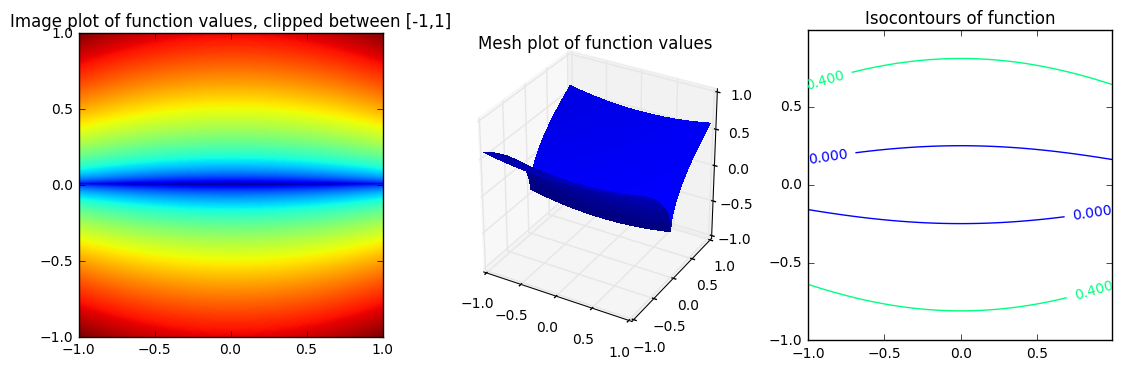

In [5]:
function_values = 0.1*X1**2 + np.sqrt(np.abs(X2)) - 0.5

visualization_func(X1, X2, function_values, contour_values=[0.0, 0.4])

## Example 2 

Generate values for $f(x_1,x_2) = \sin(2*pi*x_1)*(x_2^2 - x_1*x_2)$

/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


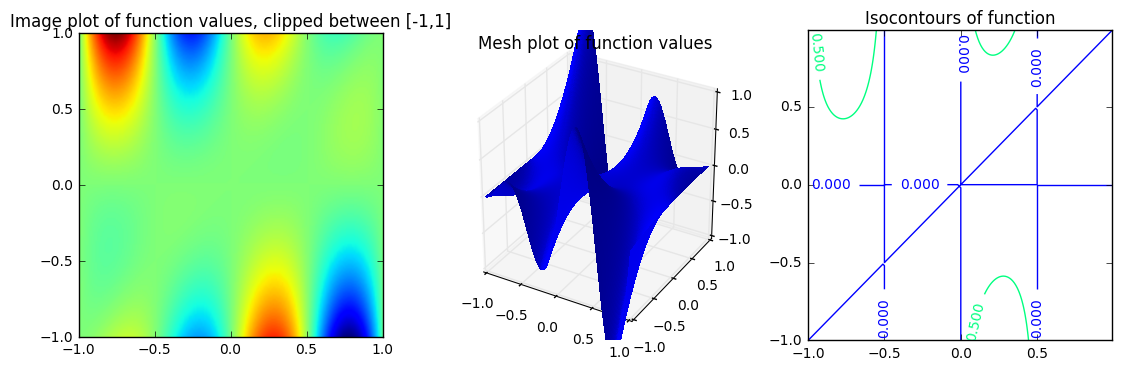

In [6]:
function_values = sin(2*pi*X1)*(X2**2 - X1*X2)

visualization_func(X1, X2, function_values, contour_values=[0.0, 0.5])

# Matrix computation

<a name="question2"/> 
## 1. Compute function values using a nested for-loop 


0.13452434539794922  seconds have passed using a nested for-loop


/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


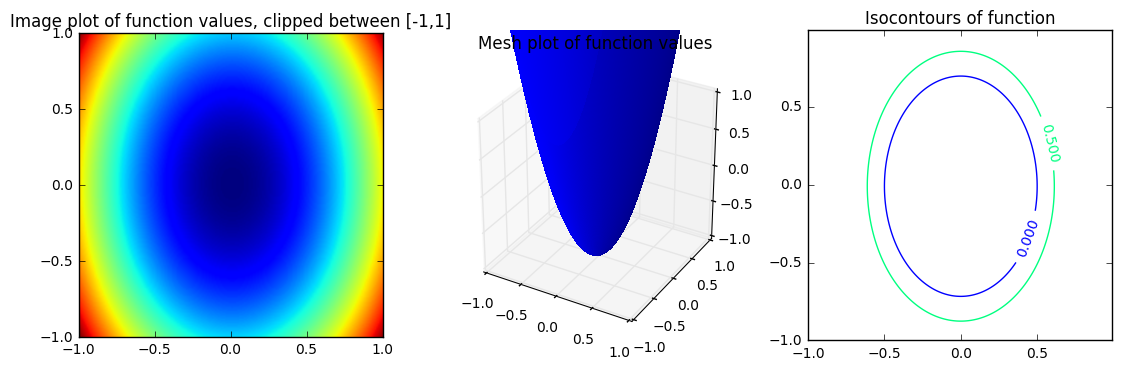

In [8]:
w = [-1, 0, 0, 4, 2, 0]

rows, cols = X1.shape

function_values = np.zeros([rows, cols], dtype=np.float32)

t = time.time()

## TODO (Question 2)
for i in range(cols):
    for j in range(rows):
        x1 = j / 100.0 - 1
        x2 = 1 - i / 100.0
        function_values[i, j] = (-1 + 0 * x1 + 0 * x2 + 
            4 * x1 ** 2 + 2 * x2 ** 2 + 0 * x1  * x2)        
## /TODO

elapsed = time.time() - t
print(elapsed, ' seconds have passed using a nested for-loop')
        
## TODO (Question 4: tweak parameters to plot the zero set)
visualization_func(X1, np.flip(X2, axis=0), function_values, contour_values=[0.0, 0.5])
## /TODO

<a name="question3"/> 
## 2. Compute using numpy's vectorized operations


0.0021457672119140625  seconds have passed using vectorized operations


/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


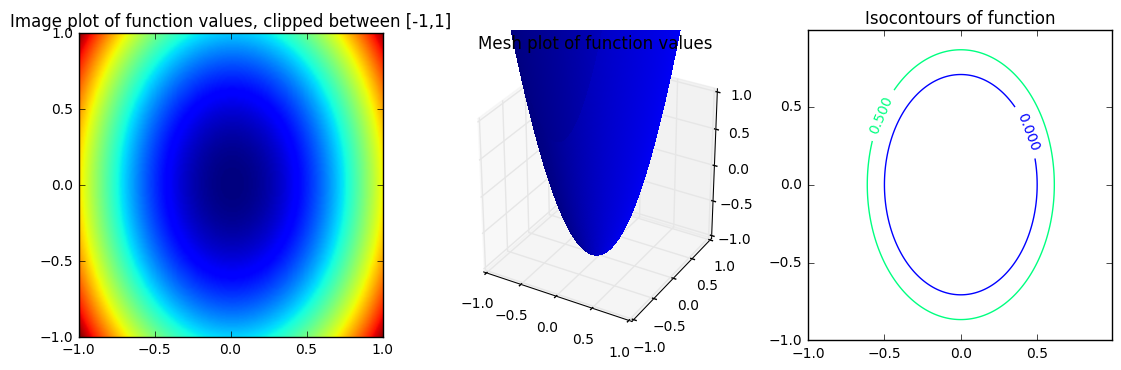

In [9]:
t = time.time()

## TODO (Question 3)
function_values = (-1 + 0 * X1 + 0 * X2 + 4 * X1 ** 2 
    + 2 * X2 ** 2 + 0 * X1 * X2)
## /TODO

elapsed = time.time() - t
print(elapsed, ' seconds have passed using vectorized operations')

## TODO (Question 4: tweak parameters to plot the zero set)
visualization_func(X1, X2, function_values, contour_values=[0.0, 0.5])
## /TODO

# Decision boundary of a classifier

<a name="question5"/> 
## 1. Probability function

In [10]:
def probability_func(X1, X2, m1, m2, sigma1, sigma2):
    ## TODO (Question 5)
    rows, cols = X1.shape
    X1_exp = ((X1 - m1)**2) / (2 * sigma1**2)
    X2_exp = ((X2 - m2)**2) / (2 * sigma2**2)
    output = 1 / (2 * pi * sigma1 * sigma2)  * exp(- X1_exp - X2_exp)
    ## /TODO
    
    return output

### Visualize the distribution of the first class

/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


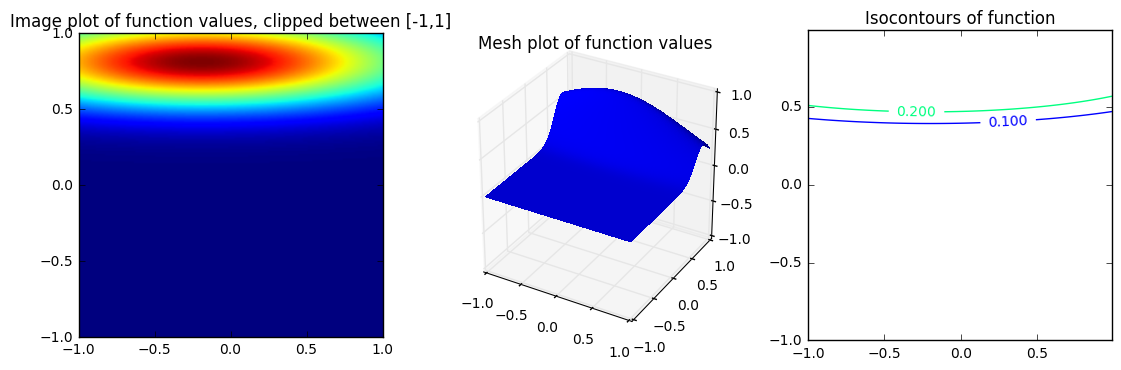

In [11]:
m0_1 = -0.2
m0_2 = 0.8
sigma0_1 = 1
sigma0_2 = 0.2

## TODO (Question 5)
class0_prob = probability_func(X1, X2, m0_1, m0_2, sigma0_1, sigma0_2)
visualization_func(X1, X2, class0_prob, contour_values=[0.1, 0.2])
## /TODO

### Visualize the distribution of the second class

/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


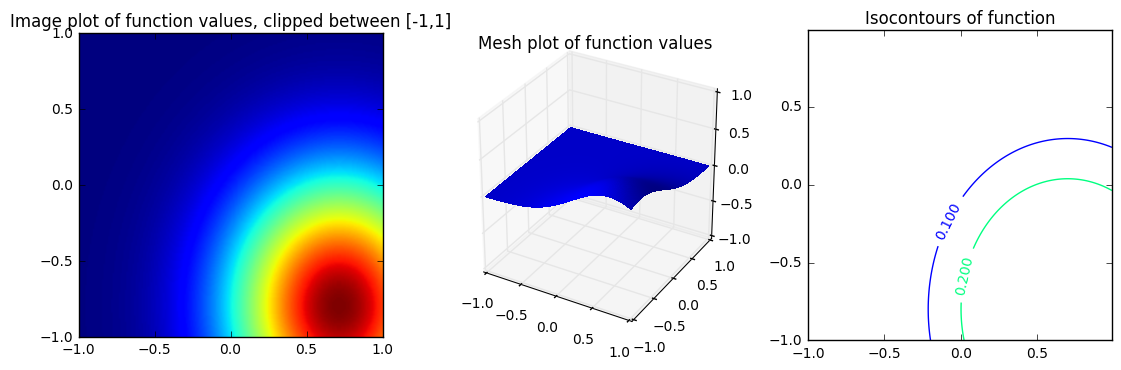

In [12]:
m1_1 = 0.7
m1_2 = -0.8
sigma1_1 = 0.5
sigma1_2 = 0.6

## TODO (Question 5)
class1_prob = probability_func(X1, X2, m1_1, m1_2, sigma1_1, sigma1_2)
visualization_func(X1, X2, class1_prob, contour_values=[0.1, 0.2])
## /TODO

<a name="question6"/> 
## 2. Decision boundary function

In [13]:
def decision_boundary_function(X1, X2, prior0):
    ## TODO (Question 6)
    class0_prob = probability_func(X1, X2, m0_1, m0_2, sigma0_1, sigma0_2)
    class1_prob = probability_func(X1, X2, m1_1, m1_2, sigma1_1, sigma1_2)
    posterior1 = class1_prob * (1 - prior0) / (class0_prob * prior0 + class1_prob * (1 - prior0)) 
    # /TODO
    return posterior1

### Visualize the decision boundary for $\pi_0 = 0.3$

/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


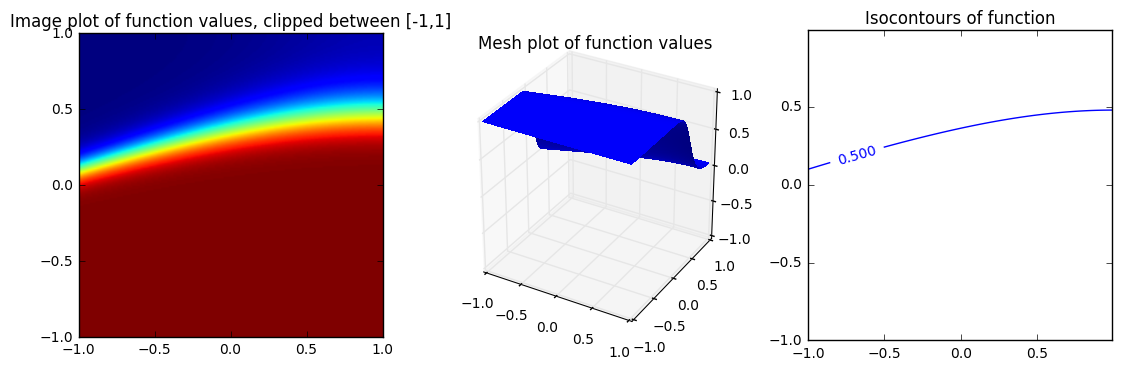

In [14]:
## TODO (Question 6)
prior0 = 0.3
posterior1 = decision_boundary_function(X1, X2, prior0)
visualization_func(X1, X2, posterior1, contour_values=[0.5])
## /TODO

<a name="question7"/> 

### Visualize the decision boundary for $\pi_0 = 0.1$

/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/home/silvianacmp/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


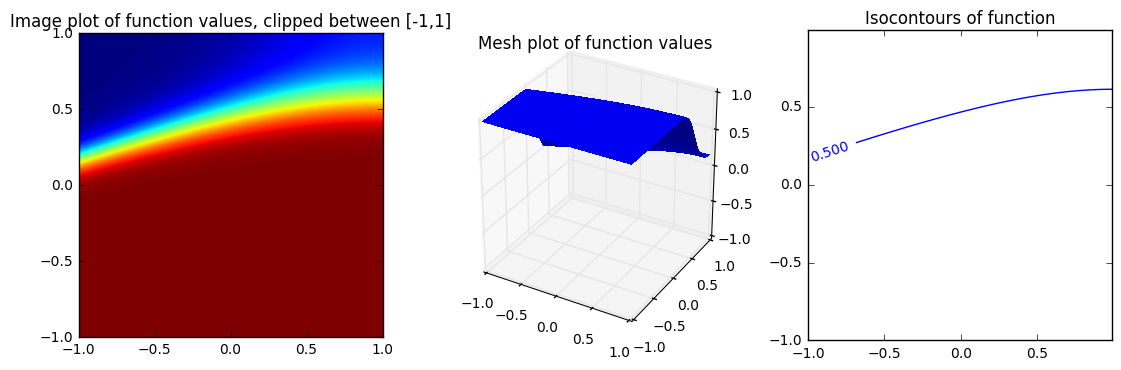

In [15]:
## TODO (Question 7)
prior0 = 0.1
posterior1 = decision_boundary_function(X1, X2, prior0)
visualization_func(X1, X2, posterior1, contour_values=[0.5])
## /TODO